## Data Collection

Import Required Libraries

In [1]:
pip install pandas yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import yfinance as yf

# Get Stock Market Data:
Use the yfinance library to download stock market data.

In [3]:
# Define the time period
start_date = '2012-01-01'
end_date = '2024-07-22'

# Download USA stock market data
usa_stock = yf.download('^GSPC', start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [4]:
usa_stock

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,1258.859985,1284.619995,1258.859985,1277.060059,1277.060059,3943710000
2012-01-04,1277.030029,1278.729980,1268.099976,1277.300049,1277.300049,3592580000
2012-01-05,1277.300049,1283.050049,1265.260010,1281.060059,1281.060059,4315950000
2012-01-06,1280.930054,1281.839966,1273.339966,1277.810059,1277.810059,3656830000
2012-01-09,1277.829956,1281.989990,1274.550049,1280.699951,1280.699951,3371600000
...,...,...,...,...,...,...
2024-07-15,5638.160156,5666.939941,5614.750000,5631.220215,5631.220215,3620470000
2024-07-16,5644.089844,5669.669922,5639.020020,5667.200195,5667.200195,4041760000
2024-07-17,5610.069824,5622.490234,5584.810059,5588.270020,5588.270020,4246450000


# Fetch Data Using API:

we will be using the FRED API to get M1 money supply data

In [5]:
import requests
import pandas as pd

# Define the API endpoint and your API key
api_key = '9a15b95c11590cad09e6f019e334b6ed'
url = f'https://api.stlouisfed.org/fred/series/observations?series_id=M1&api_key={api_key}&file_type=json'

# Make a request to the API
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON data
    data = response.json()

    # Convert the data to a DataFrame
    m1_data_usa = pd.DataFrame(data['observations'])
    m1_data_usa['date'] = pd.to_datetime(m1_data_usa['date'])
    m1_data_usa.set_index('date', inplace=True)
    m1_data_usa['value'] = m1_data_usa['value'].astype(float)

    # Print the data
    print(m1_data_usa.head())  # Print the first few rows of the DataFrame
else:
    print(f"Failed to fetch data: {response.status_code}")

           realtime_start realtime_end  value
date                                         
1975-01-06     2024-07-18   2024-07-18  273.4
1975-01-13     2024-07-18   2024-07-18  273.7
1975-01-20     2024-07-18   2024-07-18  273.8
1975-01-27     2024-07-18   2024-07-18  273.7
1975-02-03     2024-07-18   2024-07-18  275.2


In [6]:
m1_data_usa

,realtime_start,realtime_end,value
date,,,
1975-01-06,2024-07-18,2024-07-18,273.4
1975-01-13,2024-07-18,2024-07-18,273.7
1975-01-20,2024-07-18,2024-07-18,273.8
1975-01-27,2024-07-18,2024-07-18,273.7
1975-02-03,2024-07-18,2024-07-18,275.2
...,...,...,...
2021-01-04,2024-07-18,2024-07-18,17757.1
2021-01-11,2024-07-18,2024-07-18,18127.3
2021-01-18,2024-07-18,2024-07-18,18134.6


# Loading Other Economic Data

In [7]:
inflation_usa = pd.read_excel('/home/tina/Self_Projects/HistoricalPrices.xlsx', 'Inflation Rate USA')

In [8]:
inflation_usa

,Date,All Items
0,1/6/2004,0.033
1,1/7/2004,0.030
2,1/8/2004,0.027
3,1/9/2004,0.025
4,1/10/2004,0.032
...,...,...
236,1/2/2024,0.032
237,1/3/2024,0.035
238,1/4/2024,0.034
239,1/5/2024,0.033


In [9]:
exchange_rate_usa = pd.read_csv('/home/tina/Self_Projects/DEXUSEU.csv')

In [10]:
exchange_rate_usa

,DATE,DEXUSEU
0,2019-07-19,1.122
1,2019-07-22,1.1214
2,2019-07-23,1.1156
3,2019-07-24,1.1141
4,2019-07-25,1.1156
...,...,...
1301,2024-07-15,1.0912
1302,2024-07-16,1.0885
1303,2024-07-17,1.0933
1304,2024-07-18,1.0913


# Data Cleaning 

Checking Data Columns

In [11]:
print(usa_stock.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [12]:
# Reset the index to make the date a column
usa_stock.reset_index(inplace=True)

# Rename the index column to 'Date' if necessary
usa_stock.rename(columns={'index': 'Date'}, inplace=True)

# Now convert the 'Date' column to datetime format
usa_stock['Date'] = pd.to_datetime(usa_stock['Date'])

In [13]:
print(usa_stock.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [14]:
print(m1_data_usa.columns)

Index(['realtime_start', 'realtime_end', 'value'], dtype='object')


In [15]:
# Reset the index to make the date a column
m1_data_usa.reset_index(inplace=True)

# Rename the index column to 'Date' if necessary
m1_data_usa.rename(columns={'index': 'Date'}, inplace=True)

# Now convert the 'Date' column to datetime format
m1_data_usa['date'] = pd.to_datetime(m1_data_usa['date'])

In [16]:
print(m1_data_usa.columns)

Index(['date', 'realtime_start', 'realtime_end', 'value'], dtype='object')


In [17]:
# Ensure consistent column names before merging
m1_data_usa.rename(columns={'date': 'Date'}, inplace=True)
exchange_rate_usa.rename(columns={'DATE': 'Date'}, inplace=True)

In [18]:
# Convert Date columns to datetime
usa_stock['Date'] = pd.to_datetime(usa_stock['Date'])
inflation_usa['Date'] = pd.to_datetime(inflation_usa['Date'])
m1_data_usa['Date'] = pd.to_datetime(m1_data_usa['Date'])
exchange_rate_usa['Date'] = pd.to_datetime(exchange_rate_usa['Date'])

# Merge the datasets
merged_data = pd.merge(usa_stock, inflation_usa, on='Date', how='outer')
merged_data = pd.merge(merged_data, m1_data_usa, on='Date', how='outer')
merged_data = pd.merge(merged_data, exchange_rate_usa, on='Date', how='outer')

# Sort the data by date
merged_data = merged_data.sort_values('Date').reset_index(drop=True)

# Handle missing values (example: forward fill)
merged_data = merged_data.fillna(method='ffill')
merged_data = merged_data.fillna(method='bfill')

# Display the first few rows of the merged data
print(merged_data.head())

# Save the merged data to a new CSV file
merged_data.to_csv('merged_data.csv', index=False)

        Date         Open         High          Low        Close    Adj Close  \
0 1975-01-06  1258.859985  1284.619995  1258.859985  1277.060059  1277.060059   
1 1975-01-13  1258.859985  1284.619995  1258.859985  1277.060059  1277.060059   
2 1975-01-20  1258.859985  1284.619995  1258.859985  1277.060059  1277.060059   
3 1975-01-27  1258.859985  1284.619995  1258.859985  1277.060059  1277.060059   
4 1975-02-03  1258.859985  1284.619995  1258.859985  1277.060059  1277.060059   

         Volume  All Items realtime_start realtime_end  value DEXUSEU  
0  3.943710e+09      0.033     2024-07-18   2024-07-18  273.4   1.122  
1  3.943710e+09      0.033     2024-07-18   2024-07-18  273.7   1.122  
2  3.943710e+09      0.033     2024-07-18   2024-07-18  273.8   1.122  
3  3.943710e+09      0.033     2024-07-18   2024-07-18  273.7   1.122  
4  3.943710e+09      0.033     2024-07-18   2024-07-18  275.2   1.122  


In [19]:
# Rename columns
merged_data.rename(columns={
    'Open': 'Stock_Open',
    'High': 'Stock_High',
    'Low': 'Stock_Low',
    'Close': 'Stock_Close',
    'Adj Close': 'Stock_Adj_Close',
    'Volume': 'Stock_Volume',
    'All Items': 'Inflation',
    'value': 'M1',
    'DEXUSEU': 'Exchange_Rate'
}, inplace=True)

# Drop redundant 'DATE' column
merged_data.drop(columns=['realtime_start', 'realtime_end'], inplace=True)

# Display the updated dataframe
print(merged_data.head())

        Date   Stock_Open   Stock_High    Stock_Low  Stock_Close  \
0 1975-01-06  1258.859985  1284.619995  1258.859985  1277.060059   
1 1975-01-13  1258.859985  1284.619995  1258.859985  1277.060059   
2 1975-01-20  1258.859985  1284.619995  1258.859985  1277.060059   
3 1975-01-27  1258.859985  1284.619995  1258.859985  1277.060059   
4 1975-02-03  1258.859985  1284.619995  1258.859985  1277.060059   

   Stock_Adj_Close  Stock_Volume  Inflation     M1 Exchange_Rate  
0      1277.060059  3.943710e+09      0.033  273.4         1.122  
1      1277.060059  3.943710e+09      0.033  273.7         1.122  
2      1277.060059  3.943710e+09      0.033  273.8         1.122  
3      1277.060059  3.943710e+09      0.033  273.7         1.122  
4      1277.060059  3.943710e+09      0.033  275.2         1.122  


In [20]:
# Keeping only necessary columns for analysis
new_data = merged_data[['Date', 'Stock_Close', 'Inflation', 'M1', 'Exchange_Rate']]

# Display the cleaned dataframe
print(new_data.head())

        Date  Stock_Close  Inflation     M1 Exchange_Rate
0 1975-01-06  1277.060059      0.033  273.4         1.122
1 1975-01-13  1277.060059      0.033  273.7         1.122
2 1975-01-20  1277.060059      0.033  273.8         1.122
3 1975-01-27  1277.060059      0.033  273.7         1.122
4 1975-02-03  1277.060059      0.033  275.2         1.122


In [21]:
# Check for missing values
new_data.isnull().sum()
new_data.dtypes

Date             datetime64[ns]
Stock_Close             float64
Inflation               float64
M1                      float64
Exchange_Rate            object
dtype: object

In [22]:
# Convert columns to numeric if they are not already
new_data['Stock_Close'] = pd.to_numeric(new_data['Stock_Close'], errors='coerce')
new_data['Inflation'] = pd.to_numeric(new_data['Inflation'], errors='coerce')
new_data['M1'] = pd.to_numeric(new_data['M1'], errors='coerce')
new_data['Exchange_Rate'] = pd.to_numeric(new_data['Exchange_Rate'], errors='coerce')

# Handle NaN values (e.g., fill with a specific value or drop)
new_data.fillna(0, inplace=True) 

# Display the cleaned dataframe
print(new_data.dtypes)
print(new_data.head())

Date             datetime64[ns]
Stock_Close             float64
Inflation               float64
M1                      float64
Exchange_Rate           float64
dtype: object
        Date  Stock_Close  Inflation     M1  Exchange_Rate
0 1975-01-06  1277.060059      0.033  273.4          1.122
1 1975-01-13  1277.060059      0.033  273.7          1.122
2 1975-01-20  1277.060059      0.033  273.8          1.122
3 1975-01-27  1277.060059      0.033  273.7          1.122
4 1975-02-03  1277.060059      0.033  275.2          1.122


/tmp/ipykernel_8423/1987961353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Stock_Close'] = pd.to_numeric(new_data['Stock_Close'], errors='coerce')
/tmp/ipykernel_8423/1987961353.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Inflation'] = pd.to_numeric(new_data['Inflation'], errors='coerce')
/tmp/ipykernel_8423/1987961353.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



# Plot the Variables:
Line charts to visualize trends over time.

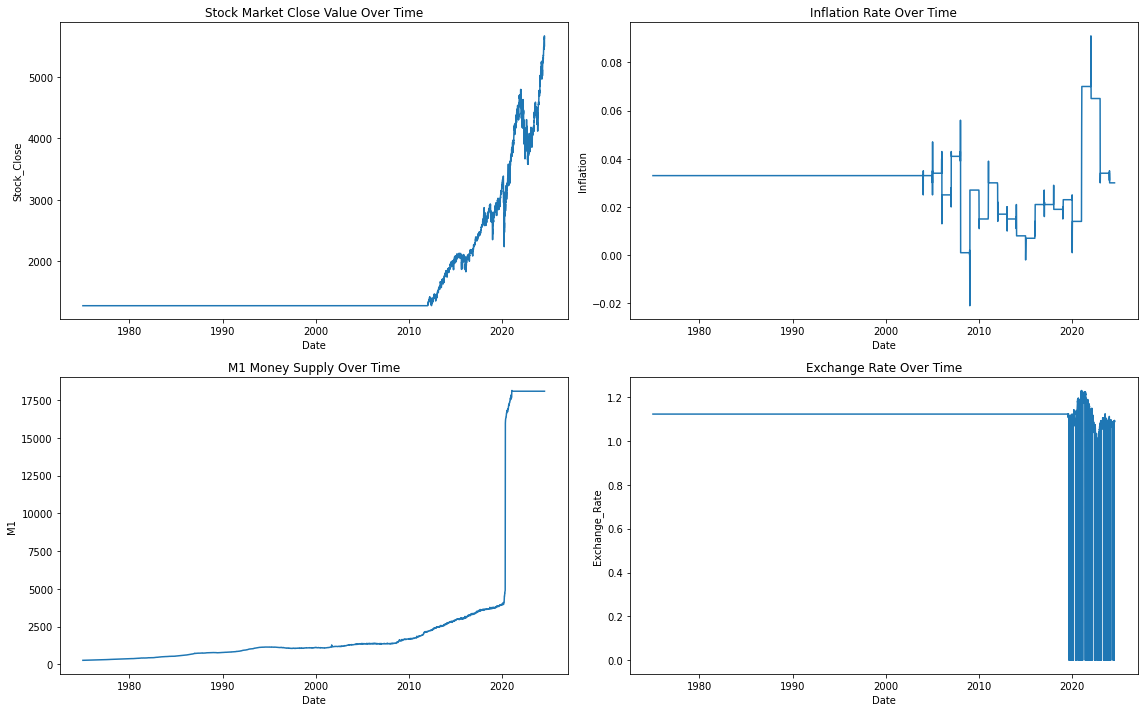

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot each variable over time
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.lineplot(x='Date', y='Stock_Close', data=new_data)
plt.title('Stock Market Close Value Over Time')

plt.subplot(2, 2, 2)
sns.lineplot(x='Date', y='Inflation', data=new_data)
plt.title('Inflation Rate Over Time')

plt.subplot(2, 2, 3)
sns.lineplot(x='Date', y='M1', data=new_data)
plt.title('M1 Money Supply Over Time')

plt.subplot(2, 2, 4)
sns.lineplot(x='Date', y='Exchange_Rate', data=new_data)
plt.title('Exchange Rate Over Time')

plt.tight_layout()
plt.show()

# Calculate Correlation Matrix:

This will show the correlation coefficients between all pairs of variables

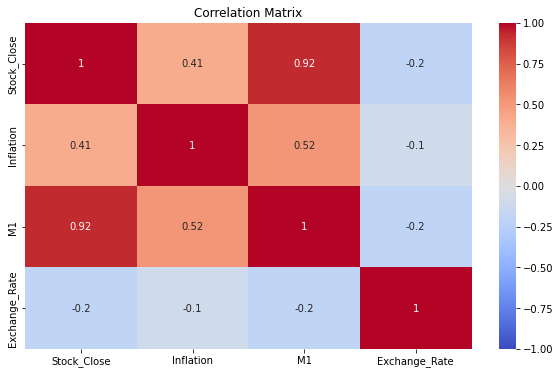

,Stock_Close,Inflation,M1,Exchange_Rate
Stock_Close,1.000000,0.406152,0.922831,-0.202025
Inflation,0.406152,1.000000,0.520890,-0.100251
M1,0.922831,0.520890,1.000000,-0.202597
Exchange_Rate,-0.202025,-0.100251,-0.202597,1.000000


In [24]:
# Calculate correlation matrix
correlation_matrix = new_data[['Stock_Close', 'Inflation', 'M1', 'Exchange_Rate']].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Display the correlation matrix
correlation_matrix

Key Observations:

Stock_Close vs. M1:
High Positive Correlation (0.922831): This strong correlation indicates that as the M1 money supply increases, the stock market performance (Stock_Close) also tends to increase significantly. This suggests that more money in circulation leads to higher stock market prices.

Stock_Close vs. Inflation:
Moderate Positive Correlation (0.406152): This moderate correlation suggests that there is some relationship between inflation and stock market performance, but it is not as strong as the correlation between Stock_Close and M1.

Inflation vs. M1:
Moderate Positive Correlation (0.520890): This indicates that an increase in the money supply is somewhat associated with an increase in inflation. This is expected, as more money in circulation can lead to higher prices.

Exchange_Rate vs. Stock_Close, Inflation, and M1:
Negative Correlations: Exchange_Rate shows a weak negative correlation with Stock_Close (-0.202025), Inflation (-0.100251), and M1 (-0.202597). This suggests that an increase in the exchange rate (indicating a weaker USD) is slightly associated with lower stock market performance, lower inflation, and lower money supply.

# Time-Shifted Correlation Matrix
Check if changes in one variable precede changes in another.

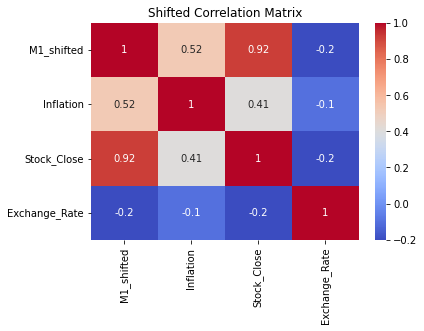

,M1_shifted,Inflation,Stock_Close,Exchange_Rate
M1_shifted,1.000000,0.521491,0.922923,-0.202556
Inflation,0.521491,1.000000,0.406152,-0.100251
Stock_Close,0.922923,0.406152,1.000000,-0.202025
Exchange_Rate,-0.202556,-0.100251,-0.202025,1.000000


In [25]:
# Shift M1 and Inflation columns
new_data1 = new_data.copy()  # Ensure you are working with a copy

new_data1['M1_shifted'] = new_data1['M1'].shift(1)  # Shift M1 by one period
new_data1['Inflation_shifted'] = new_data1['Inflation'].shift(1)  # Shift Inflation by one period

# Calculate correlation matrix again with shifted columns
shifted_correlation_matrix = new_data1[['M1_shifted', 'Inflation', 'Stock_Close', 'Exchange_Rate']].corr()
sns.heatmap(shifted_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Shifted Correlation Matrix')
plt.show()

shifted_correlation_matrix

Key Observations:

M1_shifted vs. Inflation:
Moderate Positive Correlation (0.521491): This is slightly higher than the non-shifted correlation (0.520890), indicating that there may be a time-lagged effect where changes in the money supply lead to changes in inflation.

M1_shifted vs. Stock_Close:
High Positive Correlation (0.922923): The correlation remains strong and almost unchanged compared to the non-shifted data. This reinforces the idea that the money supply has a significant and almost immediate impact on stock market performance.

Exchange_Rate:
Consistent Negative Correlations: The slight increase in negative correlation with M1_shifted (-0.202556) and minimal change with other variables suggest that the exchange rate's relationship with these variables remains weakly negative, even when considering time shifts.

## Theoretical Framework

# Theory:
Increased M1 money supply leads to stock market appreciation and increased inflation, while the exchange rate shows a weaker relationship with these variables.

Breaking down this theory and reference the observed correlations:

1. # M1 Money Supply and Stock Market Performance:
Observation: There is a high positive correlation (0.922831) between M1 money supply and Stock_Close.
Theory: As the M1 money supply increases, there is more liquidity in the economy. This increased liquidity often results in more investment in the stock market, driving up stock prices. Therefore, an increase in the M1 money supply leads to stock market appreciation.

2. # M1 Money Supply and Inflation:
Observation: There is a moderate positive correlation (0.520890) between M1 money supply and Inflation.
Theory: When the money supply increases, more money chases the same amount of goods and services, leading to higher prices. This relationship indicates that an increase in the M1 money supply can lead to higher inflation. The moderate correlation suggests that other factors also play a role in influencing inflation.

3. # M1 Money Supply (Shifted) and Inflation:
Observation: The time-shifted correlation (0.521491) between M1_shifted and Inflation is slightly higher than the non-shifted correlation.
Theory: This suggests a potential lag effect where changes in the money supply might take some time to influence inflation. This lag can occur due to delays in how monetary policy impacts the economy or how businesses and consumers react to changes in money supply.

4. # Exchange Rate and Other Variables:
Observation: The exchange rate shows weak negative correlations with Stock_Close (-0.202025), Inflation (-0.100251), and M1 (-0.202597).
Theory: The exchange rate's weak negative correlation with these variables indicates that when the exchange rate increases (USD weakens), there is a slight tendency for lower stock market performance, lower inflation, and lower money supply. However, these relationships are not strong, suggesting that the exchange rate is influenced by a broader range of factors beyond just the M1 money supply and stock market performance.

5. # Stock Market Performance and Inflation:
Observation: There is a moderate positive correlation (0.406152) between Stock_Close and Inflation.
Theory: This relationship suggests that as the stock market appreciates, there is a tendency for inflation to increase. This could be due to a wealth effect, where higher stock prices increase consumer wealth and spending, leading to higher demand and prices.

# Conclusion:
The observed correlations support the theory that an increased M1 money supply leads to stock market appreciation and increased inflation. The exchange rate shows a weaker relationship with these variables, indicating it is influenced by a broader range of factors. The time-shifted analysis suggests that changes in the money supply can have delayed effects on inflation. Overall, these relationships highlight the interconnected nature of monetary policy, stock market performance, and inflation.


# Theory Summary:
we found out that:

High positive correlation between M1 and Stock_Close: Increased money supply leads to stock market appreciation.
Moderate positive correlation between M1 and Inflation: Increased money supply leads to higher inflation.
Weak negative correlations of Exchange_Rate with Stock_Close, Inflation, and M1: Exchange rate shows a weaker relationship with these variables.
Moderate positive correlation between Stock_Close and Inflation: Stock market appreciation is associated with higher inflation.
Time-shifted correlation analysis: Changes in money supply can have delayed effects on inflation.

## Productivity Model
 Objective:
Develop a model combining the three variables (Stock_Close, Inflation, M1) to calculate productivity and analyze its trends.

Steps and Detailed Codes:
1. Formulate the Productivity Model: we'll create a productivity measure based on the provided variables. we would be using this Productivity formula

Stock_Close
Inflation
×
M1
Productivity= 
Inflation
Stock_Close
​
 ×M1

In [26]:
new_data

,Date,Stock_Close,Inflation,M1,Exchange_Rate
0,1975-01-06,1277.060059,0.033,273.4,1.1220
1,1975-01-13,1277.060059,0.033,273.7,1.1220
2,1975-01-20,1277.060059,0.033,273.8,1.1220
3,1975-01-27,1277.060059,0.033,273.7,1.1220
4,1975-02-03,1277.060059,0.033,275.2,1.1220
...,...,...,...,...,...
5290,2024-07-15,5631.220215,0.030,18085.9,1.0912
5291,2024-07-16,5667.200195,0.030,18085.9,1.0885
5292,2024-07-17,5588.270020,0.030,18085.9,1.0933
5293,2024-07-18,5544.589844,0.030,18085.9,1.0913


In [27]:
new_data.dropna

<bound method DataFrame.dropna of            Date  Stock_Close  Inflation       M1  Exchange_Rate
0    1975-01-06  1277.060059      0.033    273.4         1.1220
1    1975-01-13  1277.060059      0.033    273.7         1.1220
2    1975-01-20  1277.060059      0.033    273.8         1.1220
3    1975-01-27  1277.060059      0.033    273.7         1.1220
4    1975-02-03  1277.060059      0.033    275.2         1.1220
...         ...          ...        ...      ...            ...
5290 2024-07-15  5631.220215      0.030  18085.9         1.0912
5291 2024-07-16  5667.200195      0.030  18085.9         1.0885
5292 2024-07-17  5588.270020      0.030  18085.9         1.0933
5293 2024-07-18  5544.589844      0.030  18085.9         1.0913
5294 2024-07-19  5505.000000      0.030  18085.9         1.0888

[5295 rows x 5 columns]>

In [29]:
# Calculate Productivity
new_data2=new_data.copy()

new_data2['Productivity'] = (new_data2['Stock_Close'] / new_data2['Inflation']) * new_data2['M1']

# Display the first few rows to check the calculation
new_data2.head()

,Date,Stock_Close,Inflation,M1,Exchange_Rate,Productivity
0,1975-01-06,1277.060059,0.033,273.4,1.122,1.058025e+07
1,1975-01-13,1277.060059,0.033,273.7,1.122,1.059186e+07
2,1975-01-20,1277.060059,0.033,273.8,1.122,1.059573e+07
3,1975-01-27,1277.060059,0.033,273.7,1.122,1.059186e+07
4,1975-02-03,1277.060059,0.033,275.2,1.122,1.064991e+07


## Analyze Productivity Trends:

Plot productivity over time to visualize trends.

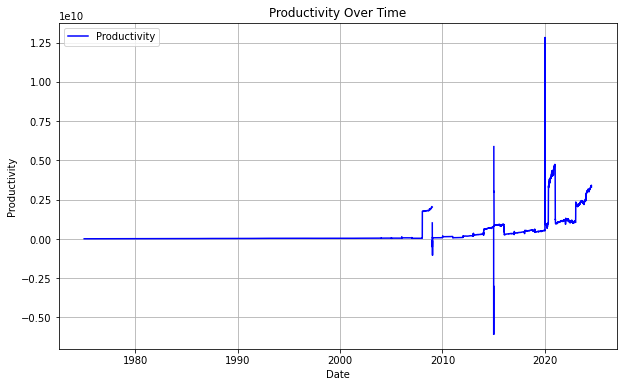

In [30]:
# Convert 'Date' to datetime format if it's not already
new_data2['Date'] = pd.to_datetime(new_data2['Date'])

# Plot Productivity over time
plt.figure(figsize=(10, 6))
plt.plot(new_data2['Date'], new_data2['Productivity'], label='Productivity', color='b')
plt.title('Productivity Over Time')
plt.xlabel('Date')
plt.ylabel('Productivity')
plt.legend()
plt.grid(True)
plt.show()

## Calculating Productivity Baseline:

Develop an appropriate formula for the productivity baseline. One approach could be to use changes in M1 and Inflation:

Baseline Productivity=( 
Past M1/
Current M1
​
 )×( 
Past Inflation/
Current Inflation
​
 )

In [31]:
# Calculate changes in M1 and Inflation
new_data2['M1_change'] = new_data2['M1'] / new_data2['M1'].shift(1)
new_data2['Inflation_change'] = new_data2['Inflation'] / new_data2['Inflation'].shift(1)

# Calculate Baseline Productivity
new_data2['Baseline_Productivity'] = new_data2['M1_change'] * new_data2['Inflation_change']

# Display the first few rows to check the calculation
new_data2.head()

,Date,Stock_Close,Inflation,M1,Exchange_Rate,Productivity,M1_change,Inflation_change,Baseline_Productivity
0,1975-01-06,1277.060059,0.033,273.4,1.122,1.058025e+07,NaN,NaN,NaN
1,1975-01-13,1277.060059,0.033,273.7,1.122,1.059186e+07,1.001097,1.0,1.001097
2,1975-01-20,1277.060059,0.033,273.8,1.122,1.059573e+07,1.000365,1.0,1.000365
3,1975-01-27,1277.060059,0.033,273.7,1.122,1.059186e+07,0.999635,1.0,0.999635
4,1975-02-03,1277.060059,0.033,275.2,1.122,1.064991e+07,1.005480,1.0,1.005480


# Compare Actual Productivity with Baseline Productivity:

Plot both actual productivity and baseline productivity together.

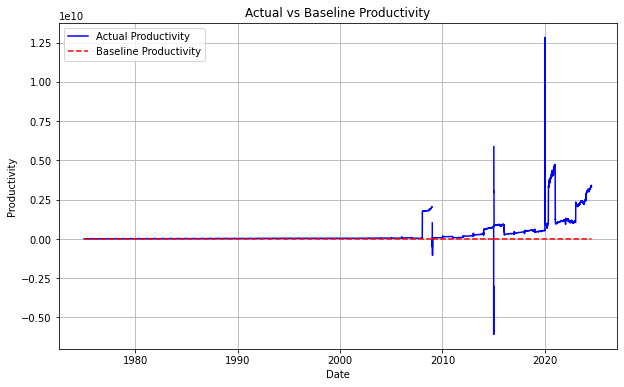

In [32]:
# Plot Actual vs Baseline Productivity
plt.figure(figsize=(10, 6))
plt.plot(new_data2['Date'], new_data2['Productivity'], label='Actual Productivity', color='b')
plt.plot(new_data2['Date'], new_data2['Baseline_Productivity'], label='Baseline Productivity', linestyle='--', color='r')
plt.title('Actual vs Baseline Productivity')
plt.xlabel('Date')
plt.ylabel('Productivity')
plt.legend()
plt.grid(True)
plt.show()

# Currency Devaluation:

Calculate real currency devaluation. Using a hypothetical scenario where M1 is stable and comparing the actual exchange rate with this scenario.

In [34]:
# Assuming a hypothetical scenario where M1 is stable
new_data2['Hypothetical_Exchange_Rate'] = new_data2['Exchange_Rate'].shift(1) * new_data2['M1_change']

# Calculate real currency devaluation
new_data2['Real_Devaluation'] = new_data2['Exchange_Rate'] - new_data2['Hypothetical_Exchange_Rate']

# Display the first few rows to check the calculation
new_data2.head()

,Date,Stock_Close,Inflation,M1,Exchange_Rate,Productivity,M1_change,Inflation_change,Baseline_Productivity,Hypothetical_Exchange_Rate,Real_Devaluation
0,1975-01-06,1277.060059,0.033,273.4,1.122,1.058025e+07,NaN,NaN,NaN,NaN,NaN
1,1975-01-13,1277.060059,0.033,273.7,1.122,1.059186e+07,1.001097,1.0,1.001097,1.123231,-0.001231
2,1975-01-20,1277.060059,0.033,273.8,1.122,1.059573e+07,1.000365,1.0,1.000365,1.122410,-0.000410
3,1975-01-27,1277.060059,0.033,273.7,1.122,1.059186e+07,0.999635,1.0,0.999635,1.121590,0.000410
4,1975-02-03,1277.060059,0.033,275.2,1.122,1.064991e+07,1.005480,1.0,1.005480,1.128149,-0.006149


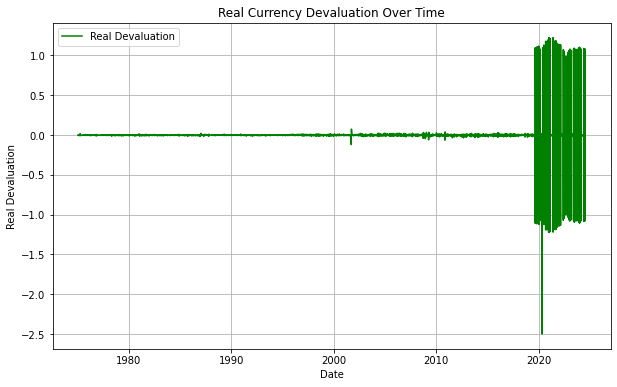

In [35]:
# Plot Real Currency Devaluation over time
plt.figure(figsize=(10, 6))
plt.plot(new_data2['Date'], new_data2['Real_Devaluation'], label='Real Devaluation', color='g')
plt.title('Real Currency Devaluation Over Time')
plt.xlabel('Date')
plt.ylabel('Real Devaluation')
plt.legend()
plt.grid(True)
plt.show()